### Prediction of TF-co-occurences for different cell lines (e.g. A375_enhancers.bed) and theire enhancer regions
e.g. Data example:
chr1	100503870	100506200	RP4-714D9.5,HIAT1

In [2]:
from tfcomb import CombObj
C = CombObj()


### Automated Pipline for market basket analyses for enhancer cell lines

In [39]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"


def do_market_basket_analyses_for_cell_line(cell_line_name: str, rel_path: str ):
    '''
        Does market basket analyses for cell line with :cell_line_name and the rel_path: to the region data.
        Saves the data to name.pkl file.
        
        e.g.:
        rel_path: "../testdaten/enhancers/A375_enhancers.bed"
    '''
    print(f'Starting with tfbs-detection and market basket analyses for cell_line: {cell_line_name}, data path:{rel_path}.')
    comb = CombObj()
    comb.TFBS_from_motifs(regions= rel_path,
                   motifs=motif_path,
                   genome=genome_path,
                   threads=4)
    print(f'TFBS detection is done for cell_line: {cell_line_name}')
    print(f'Start market basket analyses for cell line: {cell_line_name}')
    comb.market_basket(threads=10)
    print(f'Finished market basket analyses for cell line: {cell_line_name}')
    print(f'Found rules: {len(comb.rules)}')
    comb.to_pickle(f'{result_path}{cell_line_name}_complete.pkl')
    print(f'Saved complete rules to {result_path}{cell_line_name}_complete.pkl')
    
    print(f'Find significat rules for cell line: {cell_line_name}')
    selected = comb.select_significant_rules(plot=False)
    print(f'Finished selection')
    print(f'count of selected rules: {len(selected.rules)}')
    
    selected.to_pickle(f'{result_path}{cell_line_name}_significant.pkl')
    print(f'Saved complete rules to {result_path}{cell_line_name}_significant.pkl')
    

#### This does read_in our enhancer region files for the different cell lines and then saves the tf_cooccurences for each into a .pkl file

In [ ]:
from os import listdir
from os.path import isfile, join

enhancer_path="../testdaten/enhancers/"
def read_in_file_names_of_folder(rel_path:str):
    return [f for f in listdir(rel_path) if isfile(join(rel_path, f))]

cell_line_names = read_in_file_names_of_folder(rel_path=enhancer_path)
for cell_line in cell_line_names:
    cell_line_name = cell_line.split('.')[0]
    print(cell_line)
    print(cell_line_name)
    do_market_basket_analyses_for_cell_line(cell_line_name=cell_line_name,
                                            rel_path=f"{enhancer_path}{cell_line}")

CD8+_enhancers.bed
CD8+_enhancers
Starting with tfbs-detection and market basket analyses for cell_line: CD8+_enhancers, data path:../testdaten/enhancers/CD8+_enhancers.bed.
INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 11%
INFO: Progress: 18%
INFO: Progress: 28%
INFO: Progress: 36%
INFO: Progress: 45%
INFO: Progress: 56%
INFO: Progress: 64%
INFO: Progress: 73%
INFO: Progress: 83%
INFO: Progress: 91%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 962548 TFBS (401 unique names) within given regions
TFBS detection is done for cell_line: CD8+_enhancers
Start market basket analyses for cell line: CD8+_enhancers
INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 22%
INFO: Progress: 30%
INFO: Progress: 42%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 84%
INFO: Progress: 92%
INFO: Finished!
INFO: Done finding co-occ

### Analyse: comparison between leucocyten: CD4+ T-Helferzellen und CD8+ T-Suppressorzellen, Caco-2_enhancers_significant (Darm Krebszellen)


In [73]:
A = CombObj().from_pickle(f"{result_path}CD4+_enhancers_significant.pkl")
A.prefix = "CD4+"

B = CombObj().from_pickle(f"{result_path}CD8+_enhancers_significant.pkl")
B.prefix = "CD8+"

A_c = CombObj().from_pickle(f"{result_path}CD4+_enhancers_complete.pkl")
A_c.prefix = "CD4+"

B_c = CombObj().from_pickle(f"{result_path}CD8+_enhancers_complete.pkl")
B_c.prefix = "CD8+"



C = CombObj().from_pickle(f"{result_path}Caco-2_enhancers_significant.pkl")
C.prefix = "Caco-2"

A.TFBS

In [90]:
A.rules[:10]


,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2556,2408,2675,1.007096,67.263173
SP2-SP1,SP2,SP1,2556,2675,2408,1.007096,67.263173
SP2-SP3,SP2,SP3,2578,2675,2607,0.976226,65.651467
SP3-SP2,SP3,SP2,2578,2607,2675,0.976226,65.651467
SP3-SP1,SP3,SP1,2300,2607,2408,0.917971,54.188781
SP1-SP3,SP1,SP3,2300,2408,2607,0.917971,54.188781
KLF3-SP2,KLF3,SP2,2082,2206,2675,0.857070,51.028703
SP2-KLF3,SP2,KLF3,2082,2675,2206,0.857070,51.028703
PATZ1-SP2,PATZ1,SP2,2460,3163,2675,0.845714,48.246039
SP2-PATZ1,SP2,PATZ1,2460,2675,3163,0.845714,48.246039


In [74]:
print(f"CD4+: {A}")
print(f"CD8+: {B}")
print(f"Caco-2: {C}")

print(f"CD4+_complete: {A_c}")
print(f"CD8+_complete: {B_c}")

CD4+: <CombObj: 198091 TFBS (401 unique names) | Market basket analysis: 5933 rules>
CD8+: <CombObj: 625203 TFBS (401 unique names) | Market basket analysis: 5618 rules>
Caco-2: <CombObj: 342517 TFBS (401 unique names) | Market basket analysis: 4817 rules>
CD4+_complete: <CombObj: 311769 TFBS (401 unique names) | Market basket analysis: 160372 rules>
CD8+_complete: <CombObj: 962548 TFBS (401 unique names) | Market basket analysis: 160789 rules>


In [75]:
compare_obj = A_c.compare(B_c)

INFO: Calculating contrast: CD4+ / CD8+
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)


In [76]:
compare_obj.rules

,TF1,TF2,CD4+_cosine,CD8+_cosine,CD4+/CD8+_cosine_log2fc,CD4+/CD8+_cosine_log2fc_pvalue,CD4+/CD8+_cosine_log2fc_pvalue_adj
AHR-ATF6,AHR,ATF6,0.033026,0.139711,-1.304316,1.287173e-11,0.000002
ATF6-AHR,ATF6,AHR,0.033026,0.139711,-1.304316,1.287173e-11,0.000002
RFX3-RXRB,RFX3,RXRB,0.029594,0.089801,-0.903453,7.935660e-07,0.127266
RXRB-RFX3,RXRB,RFX3,0.029594,0.089801,-0.903453,7.935660e-07,0.127266
NR3C1-TFEB,NR3C1,TFEB,0.015293,0.058167,-0.833117,6.507370e-06,1.000000
...,...,...,...,...,...,...,...
FOS-FOSL2,FOS,FOSL2,0.361287,0.144311,1.124337,7.012899e-06,1.000000
JUN-JUNB,JUN,JUNB,0.382696,0.153419,1.129647,2.713180e-06,0.435118
JUNB-JUN,JUNB,JUN,0.382696,0.153419,1.129647,2.713180e-06,0.435118
JUN-FOS,JUN,FOS,0.376444,0.149213,1.139924,5.391554e-06,0.864654


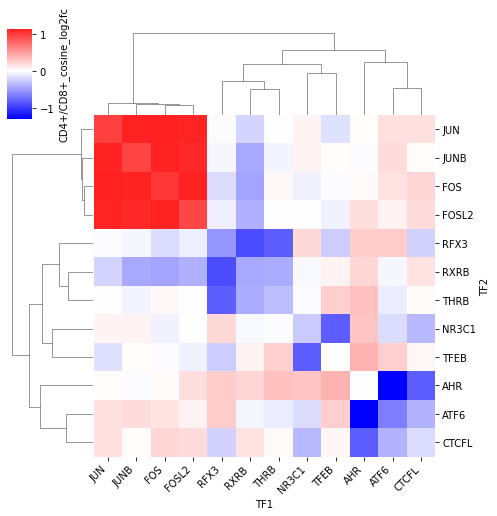

In [79]:
compare_obj.plot_heatmap()

INFO: Selecting rules for contrast: ('CD4+', 'CD8+')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


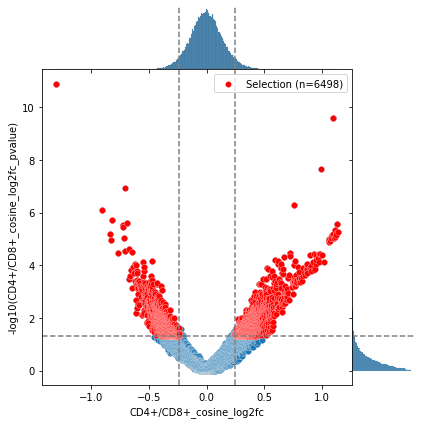

In [80]:
selection = compare_obj.select_rules()


INFO: Finished! The network is found within <CombObj>.network.


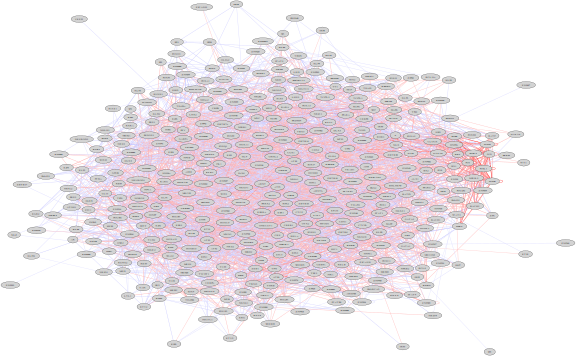

In [81]:
selection.plot_network()

In [84]:
selection.rules[-10:]

,TF1,TF2,CD4+_cosine,CD8+_cosine,CD4+/CD8+_cosine_log2fc,CD4+/CD8+_cosine_log2fc_pvalue,CD4+/CD8+_cosine_log2fc_pvalue_adj
JUN-FOSL2,JUN,FOSL2,0.374479,0.151570,1.115187,0.000005,0.735331
FOSL2-JUN,FOSL2,JUN,0.374479,0.151570,1.115187,0.000005,0.735331
FOS-JUNB,FOS,JUNB,0.370528,0.148826,1.122216,0.000006,0.990517
JUNB-FOS,JUNB,FOS,0.370528,0.148826,1.122216,0.000006,0.990517
FOSL2-FOS,FOSL2,FOS,0.361287,0.144311,1.124337,0.000007,1.000000
FOS-FOSL2,FOS,FOSL2,0.361287,0.144311,1.124337,0.000007,1.000000
JUN-JUNB,JUN,JUNB,0.382696,0.153419,1.129647,0.000003,0.435118
JUNB-JUN,JUNB,JUN,0.382696,0.153419,1.129647,0.000003,0.435118
JUN-FOS,JUN,FOS,0.376444,0.149213,1.139924,0.000005,0.864654
FOS-JUN,FOS,JUN,0.376444,0.149213,1.139924,0.000005,0.864654


In [92]:
test = A.get_pair_locations("SP1","SP2")
test

[(chr1	1116768	1116790	SP1	-, chr1	1116883	1116905	SP2	-, 93),
 (chr1	1116772	1116794	SP2	-, chr1	1116879	1116901	SP1	-, 85),
 (chr1	1116879	1116901	SP1	-, chr1	1116970	1116992	SP2	-, 69),
 (chr1	1116883	1116905	SP2	-, chr1	1116966	1116988	SP1	-, 61),
 (chr1	1116966	1116988	SP1	-, chr1	1117035	1117057	SP2	-, 47),
 (chr1	1116970	1116992	SP2	-, chr1	1117044	1117066	SP1	-, 52),
 (chr1	1574034	1574056	SP2	+, chr1	1574074	1574096	SP1	+, 18),
 (chr1	1574038	1574060	SP1	+, chr1	1574070	1574092	SP2	+, 10),
 (chr1	1575454	1575476	SP2	+, chr1	1575496	1575518	SP1	-, 20),
 (chr1	1575496	1575518	SP1	-, chr1	1575604	1575626	SP2	+, 86),
 (chr1	1918534	1918556	SP1	+, chr1	1918574	1918596	SP2	-, 18),
 (chr1	1918714	1918736	SP1	+, chr1	1918806	1918828	SP2	+, 70),
 (chr1	1919714	1919736	SP2	+, chr1	1919759	1919781	SP1	+, 23),
 (chr1	2134719	2134741	SP2	-, chr1	2134798	2134820	SP1	-, 57),
 (chr1	2573444	2573466	SP1	+, chr1	2573513	2573535	SP2	+, 47),
 (chr1	2573861	2573883	SP1	-, chr1	2573942	2573964	SP2	

In [82]:
compare_obj_error = A.compare(B)

INFO: Calculating contrast: CD4+ / CD8+


FloatingPointError: invalid value encountered in sqrt

### Find bindings sites for TF in region with the binding sites of the Hocomoco File
Todo:Things to iterate
Use another motif file?
Use another genome file?

In [3]:
C.TFBS_from_motifs(regions="../testdaten/enhancers/A375_enhancers.bed",
                   motifs="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../testdaten/hg19_masked.fa",
                   threads=4)


INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 9%
INFO: Progress: 18%
INFO: Progress: 27%
INFO: Progress: 37%
INFO: Progress: 45%
INFO: Progress: 55%
INFO: Progress: 65%
INFO: Progress: 73%
INFO: Progress: 82%
INFO: Progress: 91%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 1090429 TFBS (401 unique names) within given regions


In [4]:
C.TFBS[:10]

[chr1	874841	874855	KLF1	7.53394	-,
 chr1	874845	874855	KLF4	8.14366	-,
 chr1	874847	874857	SALL4	8.03032	-,
 chr1	874860	874882	ZNF341	8.38697	-,
 chr1	874860	874882	ZNF467	8.53969	-,
 chr1	874861	874883	MAZ	9.38904	-,
 chr1	874863	874882	KLF15	11.45194	-,
 chr1	874866	874885	KLF6	7.67825	-,
 chr1	874866	874888	PATZ1	9.59366	-,
 chr1	874867	874887	WT1	7.23058	-]

### Market Basket analyses for co-occurences:

In [6]:
C.market_basket(threads=10)

INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [32]:
C.rules

160789

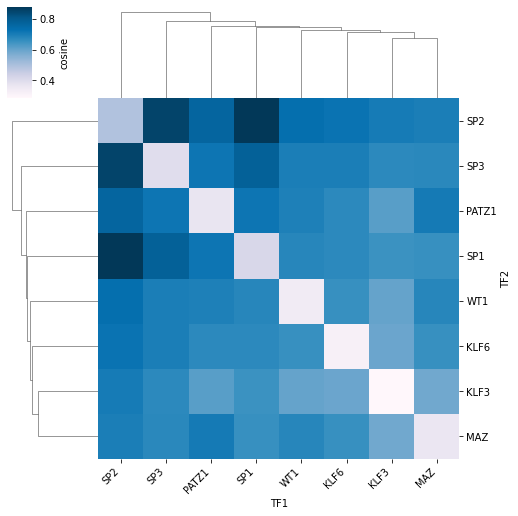

In [7]:
_ = C.plot_heatmap()

/home/stud6/.conda/envs/tfcomb_env/lib/python3.7/site-packages/tfcomb/plotting.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


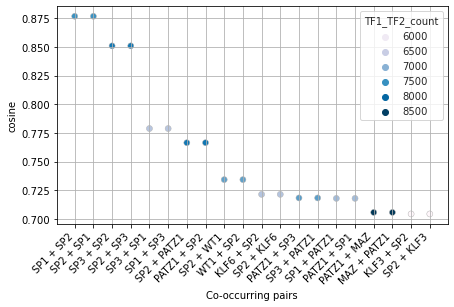

In [8]:
_ = C.plot_bubble()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


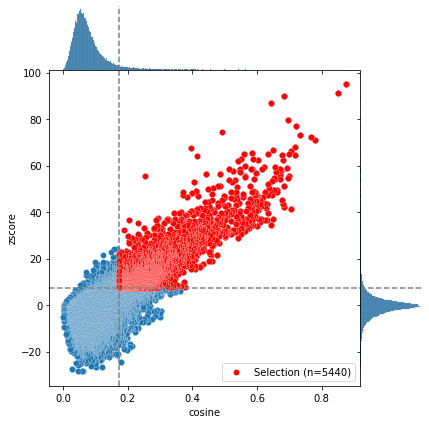

In [9]:
selected = C.select_significant_rules()

In [10]:
selected

<CombObj: 662248 TFBS (401 unique names) | Market basket analysis: 5440 rules>

In [11]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753
...,...,...,...,...,...,...,...
ZNF467-ELK1,ZNF467,ELK1,667,12405,1211,0.172090,10.821837
ASCL1-NR2F1,ASCL1,NR2F1,669,3039,4976,0.172036,7.696565
NR2F1-ASCL1,NR2F1,ASCL1,669,4976,3039,0.172036,7.696565
PBX3-SP1,PBX3,SP1,632,1699,7961,0.171845,7.691911


In [12]:
top_rules_100 = C.select_top_rules(n=100)

In [13]:
top_rules_100.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753
...,...,...,...,...,...,...,...
VEZF1-WT1,VEZF1,WT1,7184,12131,10718,0.630030,36.736208
ZBTB17-MAZ,ZBTB17,MAZ,7560,11129,13064,0.626983,41.875239
MAZ-ZBTB17,MAZ,ZBTB17,7560,13064,11129,0.626983,41.875239
PATZ1-ZNF281,PATZ1,ZNF281,6485,11313,9475,0.626371,48.670190


In [14]:
top_rules_100.to_pickle("./results/A375_enhancers_selected_100.pkl")

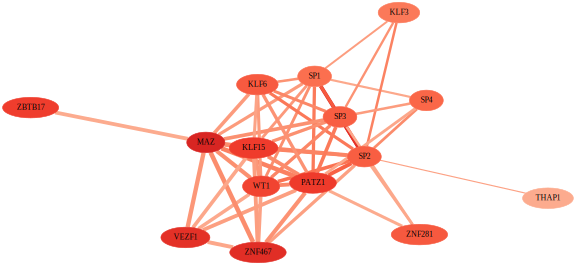

In [22]:
top_rules_100.plot_network()

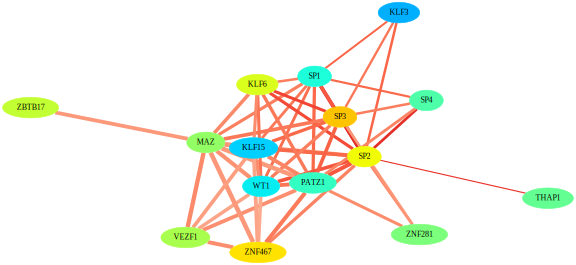

In [18]:
top_rules_100.plot_network(color_node_by="TF1", color_edge_by="zscore")

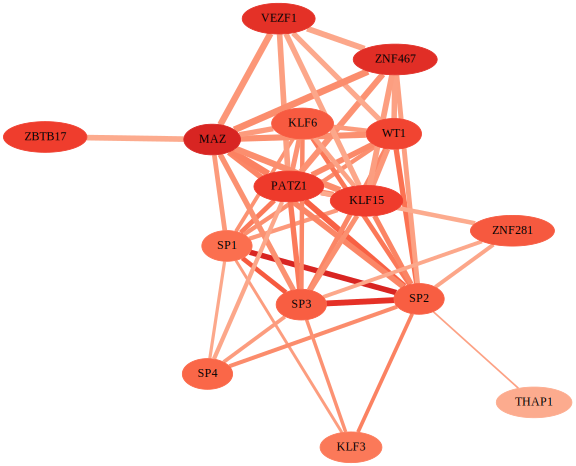

In [20]:
top_rules_100.plot_network(engine="fdp")

INFO: Finished! The network is found within <CombObj>.network.


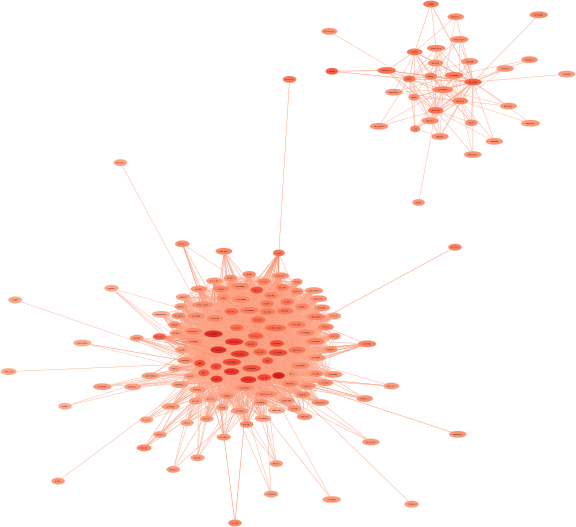

In [21]:
selected.plot_network()

In [24]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753
...,...,...,...,...,...,...,...
ZNF467-ELK1,ZNF467,ELK1,667,12405,1211,0.172090,10.821837
ASCL1-NR2F1,ASCL1,NR2F1,669,3039,4976,0.172036,7.696565
NR2F1-ASCL1,NR2F1,ASCL1,669,4976,3039,0.172036,7.696565
PBX3-SP1,PBX3,SP1,632,1699,7961,0.171845,7.691911


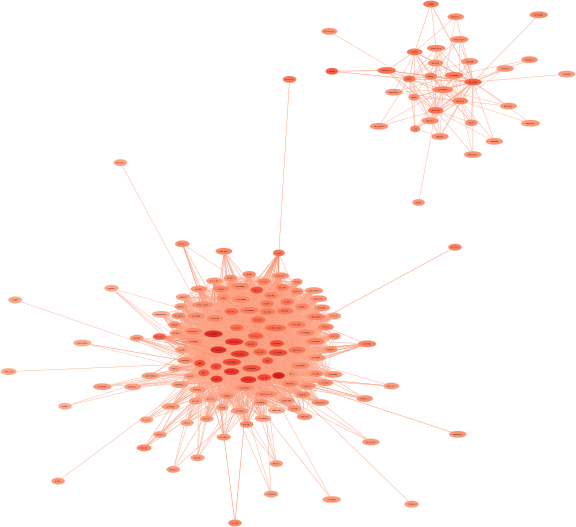

In [31]:
selected.plot_network()